<a href="https://colab.research.google.com/github/Danysan1/ai-unibo-nlp-project/blob/main/execution_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assigment 1 execution

Corpora: https://www.nltk.org/nltk_data/ , point 91, "Dependency Parsed Treebank" ([link](https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/dependency_treebank.zip)).

Docs:
* https://www.nltk.org/api/nltk.corpus.html
* https://www.nltk.org/data.html
* https://www.nltk.org/install.html

## Preparing the environment

In [ ]:
#%pip install pandas numpy matplotlib nltk

In [ ]:
from re import sub
from os.path import exists
from urllib.request import urlretrieve
from zipfile import ZipFile
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [1]:
import os, shutil  #  file management
import sys 
import pandas as pd  #  dataframe management
import numpy as np  #  data manipulation
import re
import urllib.request  # download files
from zipfile import ZipFile # extract files
from matplotlib import pyplot as plt

## Downloading the dataset

In [ ]:
#from nltk import download
#download()

In [ ]:
if not exists('dependency_treebank'):
    urlretrieve(
        'https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/dependency_treebank.zip',
        'dependency_treebank.zip'
    )
    
    with ZipFile('dependency_treebank.zip', 'r') as zObject:
        # Extracting all the members of the zip  into a specific location.
        zObject.extractall()

In [2]:
dataset_folder = os.path.join(os.getcwd(), "Dataset")

if not os.path.exists(dataset_folder):
    os.makedirs(dataset_folder)

url = 'https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/dependency_treebank.zip'

dataset_path = os.path.join(dataset_folder, "dependency_treebank.zip")

if not os.path.exists(dataset_path):
    urllib.request.urlretrieve(url, dataset_path)
    print("Successful download")
    
with ZipFile(dataset_path, 'r') as zObject:
  # Extracting all the members of the zip  into a specific location.
  zObject.extractall(dataset_folder)
  print("Successful extraction")

Successful download
Successful extraction


## Loading the data

In [ ]:
#from nltk.corpus import dependency_treebank
#from nltk.data import load
#dependency_treebank_test = load("nltk:") 
#sentences = dependency_treebank.sents()
#words = dependency_treebank.words()

In [3]:
def loadCorpus(start, stop=None):
    '''
    Parameters:
        start: start of numeric range of files (inclusive)
        stop: end of numeric range of files (exclusive)
    '''
    if stop==None:
        stop = start+1
    
    return pd.concat([
        pd.read_csv(f'./dependency_treebank/wsj_{"{:04d}".format(num)}.dp', sep="\t", names=["word","label","num"]) for num in range(start, stop)
    ])

In [5]:
def loadCorpus(start, stop=None):
    '''
    Parameters:
        start: start of numeric range of files (inclusive)
        stop: end of numeric range of files (exclusive)
    '''
    dataset_name = "dependency_treebank"
    folder = os.path.join(os.getcwd(), "Dataset", dataset_name)
    if stop==None:
        stop = start+1
    
    return pd.concat([
        pd.read_csv(f'{folder}/wsj_{"{:04d}".format(num)}.dp', sep="\t", names=["word","label","num"]) for num in range(start, stop)
    ])

In [6]:
full_dataset = loadCorpus(1,200)

## Exploratory Data Analysis

In [7]:
full_dataset.count()

word     94084
label    94084
num      94084
dtype: int64

In [8]:
full_dataset.head(10)

,word,label,num
0,Pierre,NNP,2
1,Vinken,NNP,8
2,",",",",2
3,61,CD,5
4,years,NNS,6
5,old,JJ,2
6,",",",",2
7,will,MD,0
8,join,VB,8
9,the,DT,11


Each document contains a different tokenized article:

In [9]:
" ".join(loadCorpus(1)["word"])

'Pierre Vinken , 61 years old , will join the board as a nonexecutive director Nov. 29 . Mr. Vinken is chairman of Elsevier N.V. , the Dutch publishing group .'

In [10]:
" ".join(loadCorpus(2)["word"])

'Rudolph Agnew , 55 years old and former chairman of Consolidated Gold Fields PLC , was named a nonexecutive director of this British industrial conglomerate .'

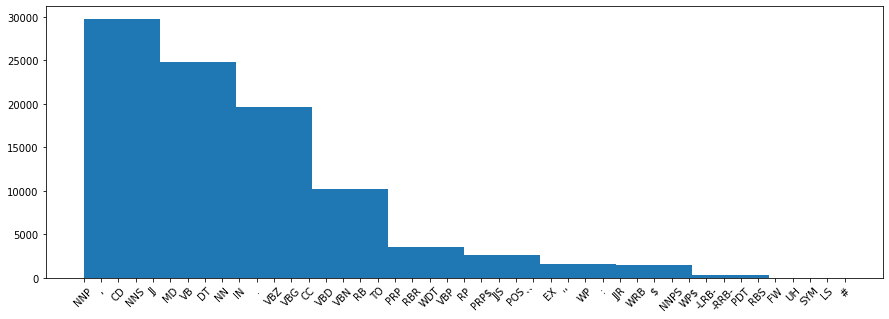

In [11]:
fig=plt.figure(figsize=(15,5))
p = plt.hist(full_dataset["label"])
plt.xticks(rotation=45)
plt.show()

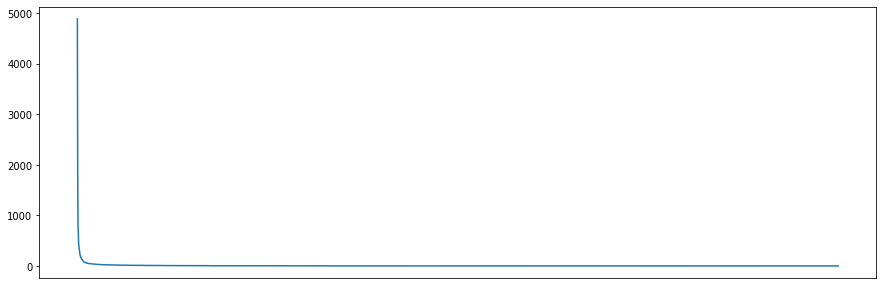

In [12]:
fig=plt.figure(figsize=(15,5))
p = plt.plot(full_dataset["word"].value_counts())
plt.xticks([])
plt.show()

## Data splitting and pre-processing





Creation of train, validation and test sets.

In [13]:
df_train = loadCorpus(1,101) 
df_val = loadCorpus(101,151)
df_test = loadCorpus(151,200)

Remove the third column 'num', which is not necessary for this task, from all the three dataframes defined above.

In [14]:
df_train = df_train[['word', 'label']]
df_val = df_val[['word', 'label']]
df_test = df_test[['word', 'label']]

Clean the data.

In [19]:
def cleanCorpus(corpus):
    corpus['word'] = corpus['word'].str.lower()
    corpus["word"] = [re.sub(r'[^\w]', '', word) for word in corpus["word"]]
    corpus = corpus[corpus["word"] != ""]
    return corpus

In [20]:
#cleaned dataframes
dfc_train = cleanCorpus(df_train)
dfc_val = cleanCorpus(df_val)
dfc_test = cleanCorpus(df_test)

In [21]:
dfc_train.head()

,word,label
0,pierre,NNP
1,vinken,NNP
3,61,CD
4,years,NNS
5,old,JJ


In [22]:
test_set = loadCorpus(1,101)
test_set.count()

word     47356
label    47356
num      47356
dtype: int64

In [23]:
test_set = cleanCorpus(test_set)
test_set.count()

word     41149
label    41149
num      41149
dtype: int64

In [24]:
test_set.head(10)

,word,label,num
0,pierre,NNP,2
1,vinken,NNP,8
3,61,CD,5
4,years,NNS,6
5,old,JJ,2
7,will,MD,0
8,join,VB,8
9,the,DT,11
10,board,NN,9
11,as,IN,9


## Word embedding

Definition of a tokenizer.

In [25]:
from tensorflow.keras.preprocessing.text import Tokenizer
# define the tokenizer
tokenizer = Tokenizer()
text = dfc_train.word.values
#fit the tokenizer on the training data
tokenizer.fit_on_texts(text)
#dictionary containing words as keys and index as values
word_to_index = tokenizer.word_index 

# number of unique words in dict.
print("Number of unique words in dictionary=", 
      len(tokenizer.word_index))
print("Dictionary is = ", tokenizer.word_index)

Number of unique words in dictionary= 7304
Dictionary is =  {'the': 1, 'of': 2, 'a': 3, 'to': 4, 'in': 5, 'and': 6, 'for': 7, 's': 8, 'that': 9, 'is': 10, 'said': 11, 'it': 12, 'on': 13, 'mr': 14, 'at': 15, 'with': 16, 'by': 17, 'as': 18, 'was': 19, 'has': 20, 'are': 21, 'nt': 22, 'have': 23, 'its': 24, 'he': 25, 'us': 26, 'new': 27, 'but': 28, 'an': 29, 'from': 30, 'be': 31, 'they': 32, 'says': 33, 'will': 34, 'about': 35, 'million': 36, 'or': 37, 'this': 38, 'company': 39, 'their': 40, 'more': 41, 'who': 42, 'were': 43, 'year': 44, 'which': 45, 'japanese': 46, 'than': 47, 'had': 48, 'would': 49, 'she': 50, 'one': 51, 'also': 52, 'been': 53, 'not': 54, 'president': 55, 'years': 56, 'billion': 57, 'market': 58, 'up': 59, 'some': 60, 'japan': 61, 'corp': 62, 'first': 63, 'other': 64, 'his': 65, 'i': 66, 'because': 67, 'two': 68, 'we': 69, 'there': 70, 'all': 71, 'can': 72, 'trading': 73, 'mrs': 74, 'last': 75, 'stock': 76, 'no': 77, 'if': 78, 'many': 79, 'so': 80, 'york': 81, 'inc': 82,

##Glove


*   Loading pre-trained dense word embedding: Glove.
*   Handling OOV words.






In [26]:
import gensim
import gensim.downloader as gloader

def load_embedding_model(model_type: str,
                         embedding_dimension: int = 50) -> gensim.models.keyedvectors.KeyedVectors:
    """
    Loads a pre-trained word embedding model via gensim library.

    :param model_type: name of the word embedding model to load.
    :param embedding_dimension: size of the embedding space to consider

    :return
        - pre-trained word embedding model (gensim KeyedVectors object)
    """
    download_path = ""
    if model_type.strip().lower() == 'word2vec':
        download_path = "word2vec-google-news-300"

    elif model_type.strip().lower() == 'glove':
        download_path = "glove-wiki-gigaword-{}".format(embedding_dimension)
    elif model_type.strip().lower() == 'fasttext':
        download_path = "fasttext-wiki-news-subwords-300"
    else:
        raise AttributeError("Unsupported embedding model type! Available ones: word2vec, glove, fasttext")
        
    try:
        emb_model = gloader.load(download_path)
    except ValueError as e:
        print("Invalid embedding model name! Check the embedding dimension:")
        print("Word2Vec: 300")
        print("Glove: 50, 100, 200, 300")
        print('FastText: 300')
        raise e

    return emb_model

In [27]:
# Modify these variables as you wish!
# Glove -> 50, 100, 200, 300
# Word2Vec -> 300
# Fasttext -> 300
embedding_model = load_embedding_model(model_type="glove",
                                       embedding_dimension=50)

[==================================================] 100.0% 66.0/66.0MB downloaded


Define the embedding matrix.

In [30]:
from tqdm import tqdm

def build_embedding_matrix(embedding_model: gensim.models.keyedvectors.KeyedVectors,
                           embedding_dimension: int,
                           word_to_idx,
                           vocab_size: int) -> np.ndarray:
    """
    Builds the embedding matrix of a specific dataset given a pre-trained word embedding model

    :param embedding_model: pre-trained word embedding model (gensim wrapper)
    :param word_to_idx: vocabulary map (word -> index) (dict)
    :param vocab_size: size of the vocabulary
    

    :return
        - embedding matrix that assigns a high dimensional vector to each word in the dataset specific vocabulary (shape |V| x d)
    """
    embedding_matrix = np.zeros((vocab_size, embedding_dimension), dtype=np.float32)
    for word, idx in tqdm(word_to_idx.items()):
        try:
            embedding_vector = embedding_model[word]
        except (KeyError, TypeError):
            embedding_vector = np.random.uniform(low=-0.05, high=0.05, size=embedding_dimension)

        embedding_matrix[idx] = embedding_vector

    return embedding_matrix

In [31]:
# Testing
embedding_dimension = 50
vocab_size = len(word_to_index) + 1
embedding_matrix = build_embedding_matrix(embedding_model, embedding_dimension, word_to_index, vocab_size )
print(f"Embedding matrix shape: {embedding_matrix.shape}")

100%|██████████| 7304/7304 [00:00<00:00, 196111.70it/s]

Embedding matrix shape: (7305, 50)


Define a label encoder for the target class.

In [32]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
dfc_train['encoded_label'] = le.fit_transform(dfc_train['label'])
dfc_val['encoded_label'] = le.transform(dfc_val['label'])
dfc_test['encoded_label'] = le.transform(dfc_test['label'])

<ipython-input-32-0164e3de4b87>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc_train['encoded_label'] = le.fit_transform(dfc_train['label'])
<ipython-input-32-0164e3de4b87>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc_val['encoded_label'] = le.transform(dfc_val['label'])
<ipython-input-32-0164e3de4b87>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

Transform the text into a sequence of integers using the tokenizer defined before. 

In [33]:
x_train = np.array(tokenizer.texts_to_sequences(dfc_train.word.values)) 
y_train =np.array( dfc_train['encoded_label'])

x_val = np.array(tokenizer.texts_to_sequences(dfc_val.word.values))
y_val = np.array(dfc_val['encoded_label'])

x_test = np.array(tokenizer.texts_to_sequences(dfc_test.word.values))
y_test = np.array(dfc_test['encoded_label'])

#number of unique labels
num_classes = len(np.unique(y_train))
vocab_size = len(word_to_index) + 1


<ipython-input-33-60b4ced3fc47>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_val = np.array(tokenizer.texts_to_sequences(dfc_val.word.values))
<ipython-input-33-60b4ced3fc47>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test = np.array(tokenizer.texts_to_sequences(dfc_test.word.values))


Pad the sequences to make them of same length before passing them to the model.

In [34]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(x_train, maxlen=1, padding='post')
x_val = pad_sequences(x_val, maxlen=1, padding='post')
x_test = pad_sequences(x_test, maxlen=1, padding='post')

#Train
print(f'X train shape: {x_train.shape}')
print(f'Y train shape: {y_train.shape}')
print(f'type:{type(x_train)}')

# Val
print(f'X val shape: {x_val.shape}')
print(f'Y val shape: {y_val.shape}')
print(f'type:{type(y_train)}')
# Test

print(f'X test shape: {x_test.shape}', x_test.shape)
print(f'Y test shape: {y_test.shape}', y_test.shape)

X train shape: (41149, 1)
Y train shape: (41149,)
type:<class 'numpy.ndarray'>
X val shape: (27263, 1)
Y val shape: (27263,)
type:<class 'numpy.ndarray'>
X test shape: (13614, 1) (13614, 1)
Y test shape: (13614,) (13614,)


Define the model.

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM, Bidirectional 

model = Sequential()
embedding_layer = Embedding(input_dim = vocab_size,output_dim= embedding_dimension,input_length=1, weights = [embedding_matrix], trainable = False)
model.add(embedding_layer)
model.add(Bidirectional(LSTM(32)))
model.add(Dense(num_classes,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1, 50)             365250    
                                                                 
 bidirectional (Bidirectiona  (None, 64)               21248     
 l)                                                              
                                                                 
 dense (Dense)               (None, 39)                2535      
                                                                 
Total params: 389,033
Trainable params: 23,783
Non-trainable params: 365,250
_________________________________________________________________


In [36]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [37]:
# fit model
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size = 64, epochs=30)

Epoch 1/30
643/643 [==============================] - 9s 7ms/step - loss: 1.8423 - accuracy: 0.5328 - val_loss: 1.3338 - val_accuracy: 0.6244
Epoch 2/30
643/643 [==============================] - 4s 7ms/step - loss: 1.0284 - accuracy: 0.7101 - val_loss: 1.0876 - val_accuracy: 0.6727
Epoch 3/30
643/643 [==============================] - 4s 6ms/step - loss: 0.8511 - accuracy: 0.7518 - val_loss: 0.9888 - val_accuracy: 0.7121
Epoch 4/30
643/643 [==============================] - 3s 5ms/step - loss: 0.7548 - accuracy: 0.7813 - val_loss: 0.9302 - val_accuracy: 0.7265
Epoch 5/30
643/643 [==============================] - 4s 6ms/step - loss: 0.6905 - accuracy: 0.7973 - val_loss: 0.8984 - val_accuracy: 0.7272
Epoch 6/30
643/643 [==============================] - 4s 6ms/step - loss: 0.6432 - accuracy: 0.8074 - val_loss: 0.8715 - val_accuracy: 0.7419
Epoch 7/30
643/643 [==============================] - 4s 6ms/step - loss: 0.6065 - accuracy: 0.8178 - val_loss: 0.8531 - val_accuracy: 0.7370
Epoch 

In [38]:
model.evaluate(x_test, y_test)

426/426 [==============================] - 1s 2ms/step - loss: 0.6583 - accuracy: 0.7850


[0.658288836479187, 0.785000741481781]

## Baseline model: LSTM

## Model A: LSTM + GRU

## Model B: 2x LSTM 

## Model C: LSTM + Dense

## Conclusions